In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [2]:
counts = pd.read_csv('Data/Brain3_treated_dt_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(17, 4822)


,ENSMUSG00000033845,ENSMUSG00000033813,ENSMUSG00000033793,ENSMUSG00000102135,ENSMUSG00000051285
19.09x18.08,0.0,0.0,0.0,0.0,0.0
19.02x19.14,0.0,0.0,0.0,0.0,0.0
19.02x20.09,0.0,0.0,1.0,0.0,1.0
20.03x18.12,0.0,0.0,4.0,0.0,0.0
20.03x19.14,0.0,0.0,0.0,0.0,0.0


In [3]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
19.09x18.08,19.09,18.08,1611.0
19.02x19.14,19.02,19.14,3148.0
19.02x20.09,19.02,20.09,5537.0
20.03x18.12,20.03,18.12,2266.0
20.03x19.14,20.03,19.14,2598.0


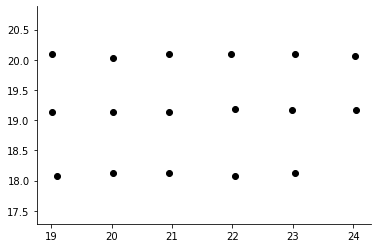

In [4]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [5]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [6]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [7]:
results.head().T

,0,1,2,3,4
FSV,2.02567e-09,0.999954,2.02567e-09,2.02567e-09,2.02567e-09
M,4,4,4,4,4
g,ENSMUSG00000017670,ENSMUSG00000032802,ENSMUSG00000030754,ENSMUSG00000040433,ENSMUSG00000038370
l,0.445,0.445,0.445,0.445,0.445
max_delta,4.85165e+08,4.53999e-05,4.85165e+08,4.85165e+08,4.85165e+08
max_ll,23.659,15.0006,18.6804,24.1794,24.156
max_mu_hat,1.74327,1.24176,1.47589,1.48105,1.48777
max_s2_t_hat,6.27132e-09,1.22478,4.50312e-09,4.52817e-09,4.56931e-09
model,SE,SE,SE,SE,SE
n,17,17,17,17,17


In [8]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
0,ENSMUSG00000017670,0.445,0.901529,0.901529
3218,ENSMUSG00000029309,0.445,0.901529,0.901529
3217,ENSMUSG00000030447,0.445,0.901529,0.901529
3216,ENSMUSG00000024639,0.445,0.901529,0.901529
3215,ENSMUSG00000030207,0.445,0.901529,0.901529


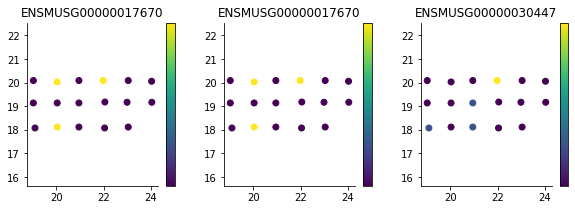

In [9]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000017670', 'ENSMUSG00000017670', 'ENSMUSG00000030447']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [10]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
1609,ENSMUSG00000066392,0.445000,0.901529
1608,ENSMUSG00000049612,0.445000,0.901529
1607,ENSMUSG00000046834,0.445000,0.901529
1606,ENSMUSG00000074797,0.445000,0.901529
1605,ENSMUSG00000039716,0.445000,0.901529
1604,ENSMUSG00000060198,0.445000,0.901529
1603,ENSMUSG00000040747,0.445000,0.901529
1602,ENSMUSG00000052512,0.445000,0.901529
1600,ENSMUSG00000020585,0.445000,0.901529
4821,ENSMUSG00000006299,3.694238,0.901529


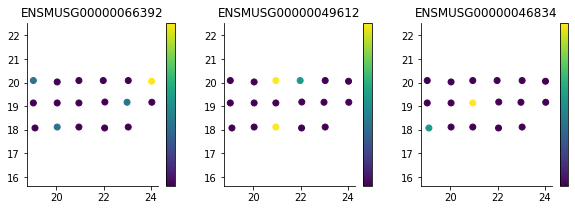

In [12]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000066392', 'ENSMUSG00000049612', 'ENSMUSG00000046834']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

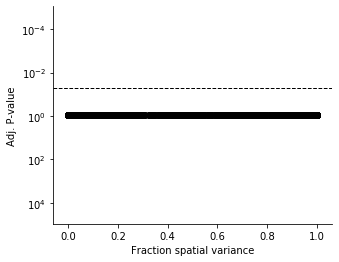

In [13]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');